# Aim:
We will classify sms phone messages as spam or ham.

In [287]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.

The file we are using contains a collection 5574 SMS phone messages. You can check out the **readme** file for more info.

In [288]:
# for each line in the file strip the white space at the end of the line and store all the messages in a list.
messages = [line.rstrip() for line in open('SMSSpamCollection')]

# Notice that each message is tab seperated with it's label.
print(messages[0])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [289]:
# Printing the first 10 messages with their labels 
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [290]:
# Read the messages with their labels into a csv file.
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [291]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Exploratory Data Analysis

In [292]:
# Only 2 unique label values and the top used label is "ham" with a frequency of 4825.
# while the top used message with the ham label is "Sorry I'll call later" with a frequency of 30 times.
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's use **groupby** to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [293]:
# Notice that sorry i will call later is the most frequent ham message.
# While "Please call our customer service representativ..." is the most frequent spam message.
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [294]:
# Create a column for the length of each msg.
# We create this column to check whether the length of a message makes a good feature do differentiate between ham and spam msgs
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualization

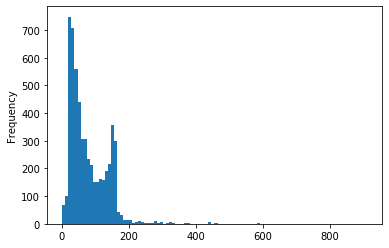

In [295]:
# Notice that most of our messages have a length of around 30 characters.
# And the words length of a messages is almost all less than 180 characters.
messages['length'].plot(bins=100, kind='hist') 

In [296]:
# Notice that there is a message of 910 characters which is pretty huge.
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [297]:
# This is the message that has 910 characters.
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002724C55B8D0>,
      dtype=object)

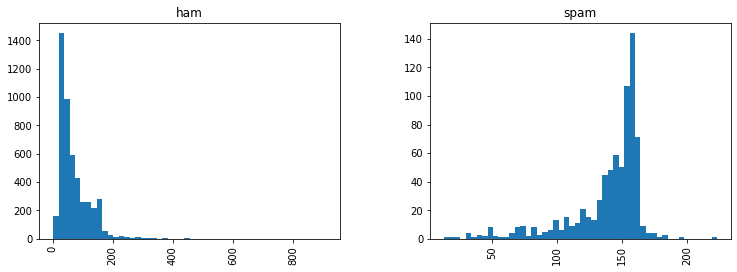

In [298]:
# Most of the spam messages tend to have a length around 150 characters.
# Most of the ham messages tend to have a length around 40 characters.
# So spam messages tend to have a higher length of characters than ham messages.
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

# Text Preprocessing

In [299]:
def text_process(message):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # convert the message to a list of no punctuation characters.
    nopunc = [char for char in message if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords from all the words in the message string.
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [300]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [301]:
# tokenize the messages into a lists of non-stop no punctuation words.
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [302]:
# Show original dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

In [303]:
from sklearn.feature_extraction.text import CountVectorizer

In [304]:
# We use count vectorizer from sklearn to Convert a collection of text documents to a matrix of word counts
# With the analyzer being the function that we used to clean the text from punctuation and stop words.
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [305]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


Let's take one text message and get its bag-of-words counts as a vector.

In [306]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


Now let's see its vector representation:

In [307]:
# Notice that there are 7 unique words in the 4th message in our cleaned dataset(no punctuation or stop words).
# Also notice that there are 2 words which have been repeated twice in the message.
bow4 = bow_transformer.transform([message4])
print(bow4)

# A bag of words consisting of 1 message with 11425 vocab words.
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [308]:
# As u can see these 2 words are repeated twice in message4 above.
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [309]:
messages_bow = bow_transformer.transform(messages['message'])

In [310]:
# A matrix consisting of alot of 0 counts since there are alot of messages and alot of words.
# 5572 messages and 11425 vocab words.
print('Shape of Sparse Matrix: ', messages_bow.shape)

# 50k out of 63M occurances.
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

the tf-idf weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

# TF-IDF:
**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

____
**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

In [311]:
from sklearn.feature_extraction.text import TfidfTransformer

# Fitting the tfidf transformer with our messages bag of words.
tfidf_transformer = TfidfTransformer().fit(messages_bow)

# for bag of words of the 4th message we apply the tf-idf to all the words in it.
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [312]:
# To transform the entire bag-of-words corpus into TF-IDF corpus at once:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [313]:
# The tf-idf value for each words in the 5572 messages.
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

# Training & Testing our model.
With messages represented as vectors of numerical values. we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms.

In [314]:
# Train/Test splitting our dataset.
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages_tfidf, messages['label'],
                                                                test_size=0.2, random_state=42)

In [315]:
# Defining our naivebayes model and fitting it on the training data.
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(msg_train, label_train)

In [316]:
# Predict the labels on the test set of messages.
predictions = spam_detect_model.predict(msg_test)

In [317]:
# Model evaluation with the labels of the test set.
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1000
        spam       0.77      1.00      0.87       115

    accuracy                           0.97      1115
   macro avg       0.89      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115



# Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [318]:
# Train Test split the who normal text data.
msg_train2, msg_test2, label_train2, label_test2 = train_test_split(messages['message'], messages['label'],
                                                                    test_size=0.2, random_state=42)

In [319]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts.
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores.
    ('classifier', MultinomialNB()),  # The Model we would like to use to classify our data.
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [320]:
# Training our model on the training data.
pipeline.fit(msg_train2,label_train2)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000027249C736A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [321]:
# Predict the labels on the test set of messages.
predictions2 = pipeline.predict(msg_test2)

In [322]:
# Model evaluation with the labels of the test set.
print(classification_report(predictions2,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1001
        spam       0.77      1.00      0.87       114

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115



In [323]:
# Notice that both the predictions we made by donig it step by step is exactly the same as the predictions using pipeline.
print(classification_report(predictions2,predictions))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1001
        spam       0.98      0.99      0.99       114

    accuracy                           1.00      1115
   macro avg       0.99      0.99      0.99      1115
weighted avg       1.00      1.00      1.00      1115

